<a href="https://colab.research.google.com/github/DammuNikhitha/AI-ML-Internship-Task-9/blob/main/01_TASK9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Task 9: Credit Card Fraud Detection using Random Forest**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


## Step 1: Load Dataset and Check Class Imbalance

We first load the dataset and analyze the distribution of fraud and non-fraud transactions.


In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
data['Class'].value_counts()

,count
Class,
0.0,55394
1.0,156


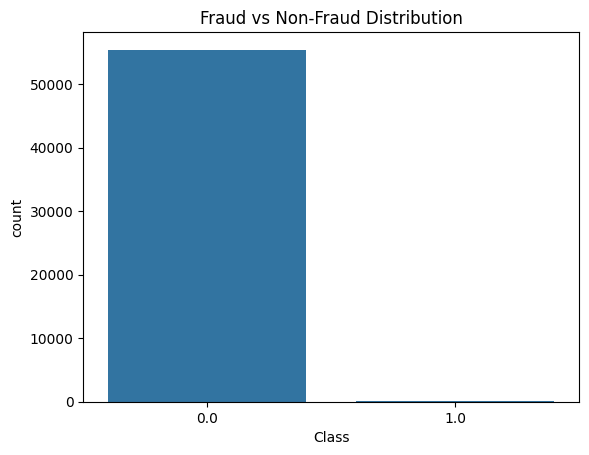

In [4]:
sns.countplot(x='Class', data=data)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

## Step 2: Separate Features and Target

We remove unnecessary identifier columns and separate features (X) and target (y).


In [5]:
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

## Step 3: Train-Test Split using Stratified Sampling

Stratified sampling ensures fraud ratio is preserved in both training and testing data.


In [8]:
data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
data['Class'].isnull().sum()


np.int64(1)

In [10]:
data = data.dropna()


In [11]:
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [13]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## Step 4: Baseline Model - Logistic Regression

We train a Logistic Regression model for comparison.


In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11079
         1.0       0.64      0.68      0.66        31

    accuracy                           1.00     11110
   macro avg       0.82      0.84      0.83     11110
weighted avg       1.00      1.00      1.00     11110



## Step 5: Train Random Forest Model

Random Forest is an ensemble learning technique that combines multiple decision trees.


In [15]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11079
         1.0       0.88      0.90      0.89        31

    accuracy                           1.00     11110
   macro avg       0.94      0.95      0.94     11110
weighted avg       1.00      1.00      1.00     11110



## Step 6: Confusion Matrix


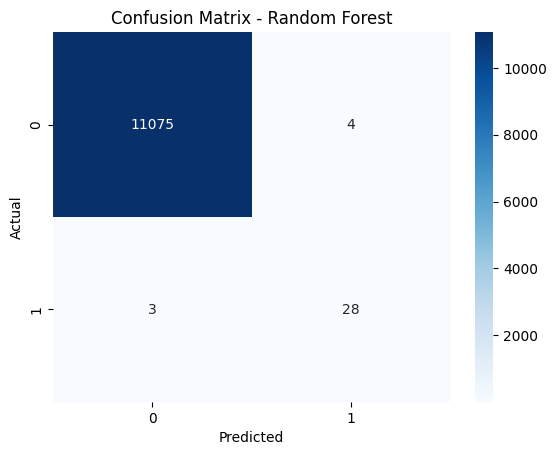

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Step 7: Feature Importance Plot

This plot shows the most important features used by the Random Forest model.


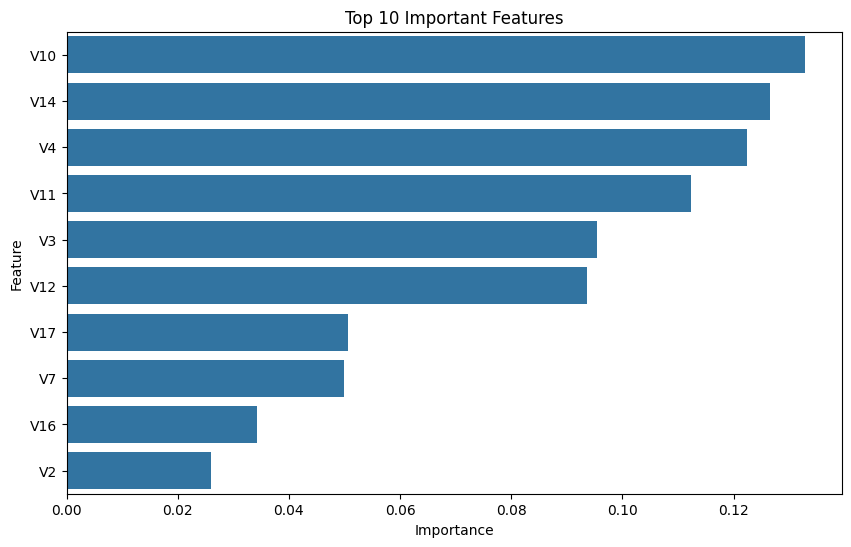

In [17]:
importances = rf_model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

## Step 8: Compare Random Forest with Baseline Model (Logistic Regression)

Since the dataset is imbalanced, accuracy is not a reliable metric.  
We compare both models using Precision, Recall, and F1-score for the fraud class (Class = 1).

The model with higher Recall and F1-score for fraud detection is considered better.


In [20]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification reports as dictionaries
log_report = classification_report(y_test, y_pred_log, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Create comparison table for Fraud class (Class = 1.0)
comparison_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Logistic Regression": [
        log_report["1.0"]["precision"],
        log_report["1.0"]["recall"],
        log_report["1.0"]["f1-score"]
    ],
    "Random Forest": [
        rf_report["1.0"]["precision"],
        rf_report["1.0"]["recall"],
        rf_report["1.0"]["f1-score"]
    ]
})

comparison_df


,Metric,Logistic Regression,Random Forest
0,Precision,0.636364,0.875000
1,Recall,0.677419,0.903226
2,F1-score,0.656250,0.888889


## Step 9: Save the Best Model

The trained Random Forest model is saved using joblib for future use.


In [18]:
joblib.dump(rf_model, "fraud_detection_model.pkl")
print("Model saved successfully!")

Model saved successfully!
